## Setup

In [1]:
from FireSimulator import *
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os
import pickle
import time

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

%load_ext autoreload
%autoreload 2

## Generate data

Run a number of simulations and save the sequence of states

In [32]:
# rng seeds
# seeds = range(50)
seeds = range(1)

# get current working directory
cwd = os.getcwd()

# simulation grid size
grid_size = 50

# data generated by an rng seed are stored in tensor of size (N,grid_size,grid_size)
# also, initialized with empty forest
save = False
if not save:
    print('--- Warning! not saving to file! ---')

tic = time.clock()
for seed in seeds:
    sim = FireSimulator(grid_size, rng=seed)
    data = np.zeros((1,grid_size,grid_size)).astype(np.uint8)

    # run simulation to termination
    while not sim.end:
        sim.step([])
        data = np.concatenate((data, sim.state[np.newaxis,:,:]), axis=0)
        
    if save:    
        filename = open(os.path.join(cwd, 'data/states_seed_%04d.pkl' % (seed,)), 'wb')
        pickle.dump(data, filename)
        filename.close()
    
    print("rng seed %d generated %d total states" %(seed,data.shape[0]))
    
toc = time.clock()
print("%0.2fs elapsed" % (toc-tic))

--- Warning! not saving to file! ---
rng seed 0 generated 182 total states
0.23s elapsed


Plot some data to make sure its sensible

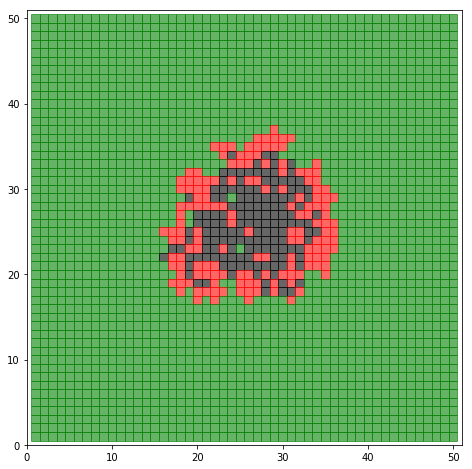

In [33]:
fig = plt.figure()
ax = plt.subplot(111, aspect="equal", autoscale_on=False)
ax.set_xlim([0,grid_size+1])
ax.set_ylim([0,grid_size+1])

plot_data = np.copy(data[21])

for i in range(0,grid_size):
    for j in range(0,grid_size):
        x = col_to_x(j) - 0.5
        y = row_to_y(grid_size,i) - 0.5
        if plot_data[i,j] == 0:
            ax.add_patch(patches.Rectangle((x,y),1,1,color="g",alpha=0.6,linestyle="None"))
        elif plot_data[i,j] == 1:
            ax.add_patch(patches.Rectangle((x,y),1,1,color="r",alpha=0.6,linestyle="None"))
        else:
            ax.add_patch(patches.Rectangle((x,y),1,1,color="k",alpha=0.6,linestyle="None")) 

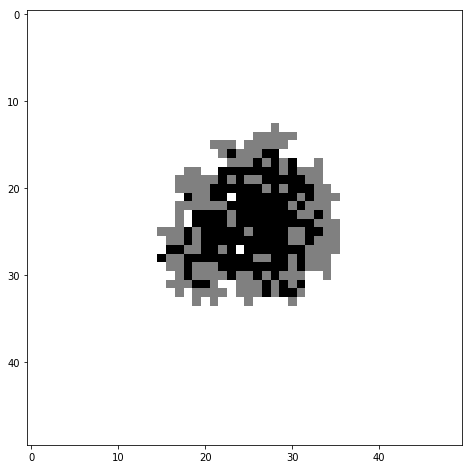

In [36]:
# fig = plt.figure()
# ax = plt.subplot(111, aspect="equal", autoscale_on=False)
# ax.set_xlim([0,grid_size+1])
# ax.set_ylim([0,grid_size+1])

plot_data_bw = np.copy(plot_data)
plot_data_bw[plot_data_bw == 0] = 255
plot_data_bw[plot_data_bw == 1] = 128
plot_data_bw[plot_data_bw == 2] = 0

plt.imshow(plot_data_bw, cmap='gray')

In [38]:
plot_data_bw

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ..., 
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)